In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
import html
import json

In [6]:
bs=48

In [7]:
path = Path('/home/cristian/projects/drafts')

# Preparing the data

In [8]:
data = Path('/home/cristian/tools/ULMFiT_es/language_model_wiki/LM/')

In [9]:
data.ls()

[PosixPath('/home/cristian/tools/ULMFiT_es/language_model_wiki/LM/train.csv'),
 PosixPath('/home/cristian/tools/ULMFiT_es/language_model_wiki/LM/val.csv')]

In [10]:
df_train = pd.read_csv(data/'train.csv', header=None)

In [11]:
df_val = pd.read_csv(data/'val.csv', header=None)

In [12]:
len(df_train)

55024

In [13]:
# prepend column of ones 
def prepend_one_cols(df):
    df[1]=np.ones(len(df))
    cols = list(df)
    cols[1], cols[0] = cols[0], cols[1]
    return df.iloc[:,cols]

In [14]:
df_train = prepend_one_cols(df_train)

In [15]:
df_train.head()

,1,0
0,1.0,González es uno de los en que se encuentra div...
1,1.0,La Unidad de Análisis Financiero (UAF) es un s...
2,1.0,Mejicanos es un municipio del departamento de ...
3,1.0,Niceland fue un grupo musical islandés de heav...
4,1.0,El Lento Violento es un género creado por el D...


In [16]:
df_val = prepend_one_cols(df_val)

In [17]:
df_val.head()

,1,0
0,1.0,"La Bandera de Soriano, Uruguay, consta de cinc..."
1,1.0,La N-525 es una que va desde la localidad zamo...
2,1.0,"Willie Weeks (Salemburg, Carolina del Norte, E..."
3,1.0,Lara Jean Chorostecki es una actriz canadiense...
4,1.0,"Jennifer Stewart (Redondo Beach, California; 2..."


In [18]:
df_val.loc[3,0]

'Lara Jean Chorostecki es una actriz canadiense, más conocida por haber interpretado a Fredricka Lounds en la serie "Hannibal".\n\nBiografía.\nTiene un hermano.\n\nEs de ascendencia polaca y escocesa.\n\nCarrera.\nEn 2009 se unió al elenco recurrente de la primera temporada de la serie "The Listener", donde interpretó a Maya.\n\nEn 2011 se unió al elenco recurrente de la serie "Camelot", donde interpretó a Bridget. En 2012 apareció en un episodio de la serie "Beauty & the Beast", donde interpretó a Iris Sodkovic. Ese mismo año se unió al elenco de la serie "Copper", donde interpretó a Sybil O\'Brien hasta el final de la serie en 2013. En 2013 apareció como invitada en la serie "Lost Girl", donde dio vida a Ianka. Ese mismo año se unió al elenco recurrente de la serie "Hannibal", donde interpretó a la periodista Fredricka "Freddie" Lounds hasta el final de la serie en 2015. En 2014 apareció como invitada en la serie "Haven", donde interpretó a la fotógrafa Amy Potter. En 2015 Lara se un

In [19]:
data_train = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_val, bs=32)

In [20]:
learn = language_model_learner(data_train, TransformerXL, drop_mult=0.3, pretrained=False)

In [19]:
learn.export()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


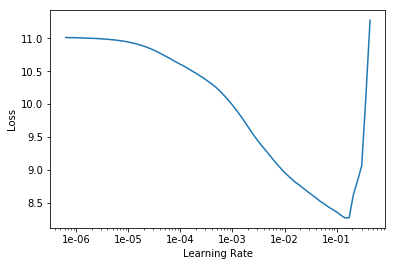

In [40]:
learn.recorder.plot()

In [21]:
lr=3e-3

In [42]:
learn.export()

In [43]:
learn.fit_one_cycle(1,lr,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,6.367736,6.325810,0.119674,2:55:53


In [44]:
learn.save('one_epoch')

In [22]:
learn.load('one_epoch')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (55024 items)
x: LMTextList
xxbos xxmaj gonzález es uno de los en que se encuentra dividido el estado mexicano de xxmaj tamaulipas , localizado en la zona suroeste del estado , su cabecera es el pueblo de mismo nombre . 
 
  xxmaj geografía . 
  xxmaj el municipio de xxmaj gonzález se encuentra en el sureste de estado de xxmaj xxunk , tiene una extensión territorial de xxunk kilómetros cuadrados que lo convierte en el cuarto municipio más extenso del estado . xxmaj sus coordenadas geográficas extremas son 23 ° 12 ' - 22 ° 24 ' de latitud norte y 98 ° 55 ' - 98 ° 18 ' de longitud oeste y su altitud fluctúa entre 50 y 1 100 metros sobre el nivel del mar . 
 
  xxmaj limita al suroeste con el municipio de xxmaj el xxmaj xxunk , al noroeste con el municipio de xxmaj xxunk , al norte con el municipio de xxmaj xxunk , al noreste con el municipio de xxmaj casas y con el municipio de xxmaj aldama y al sureste con el municipio de xxmaj alt

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


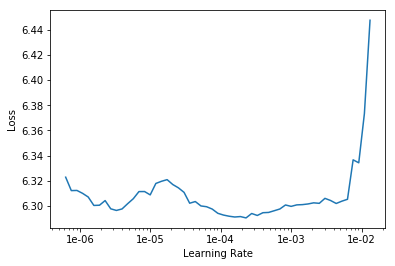

In [26]:
learn.recorder.plot(skip_end=20)

In [ ]:
learn.fit_one_cycle(5,lr,moms=(0.8,0.7))

In [28]:
learn.save('6_epochs')

In [31]:
with open('recorder_data-6_epochs.pkl', 'wb') as f:
    pickle.dump(learn.recorder.metrics, f)
    pickle.dump(learn.recorder.losses, f)
    pickle.dump(learn.recorder.val_losses, f)